In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df1 = df.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'}, axis=True)
df1.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df1.shape

(21, 2)

In [6]:
df1.describe()

,Delivery_time,Sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df1.isnull().sum()

Delivery_time    0
Sorting_time     0
dtype: int64

In [8]:
df1.duplicated().sum()

0

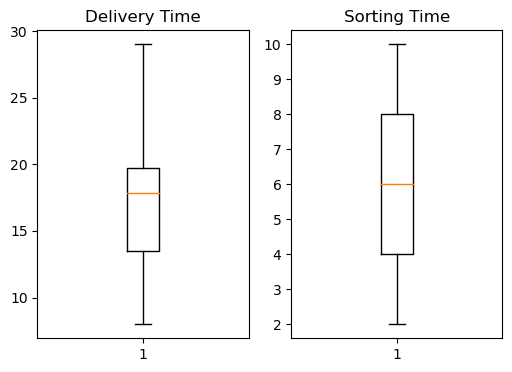

In [9]:
plt.subplots(figsize = (6,4))
plt.subplot(121)
plt.boxplot(df1['Delivery_time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df1['Sorting_time'])
plt.title('Sorting Time')
plt.show()

In [10]:
df1.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<Axes: >

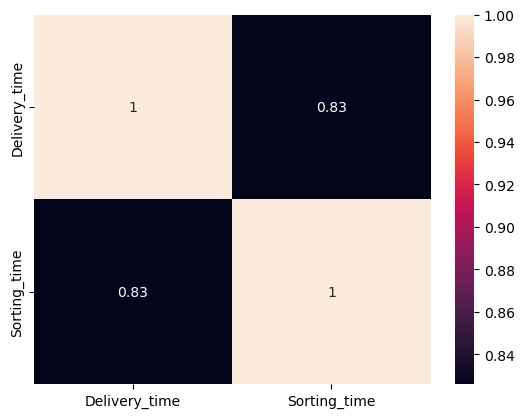

In [11]:
sns.heatmap(df1.corr(),annot=True)

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

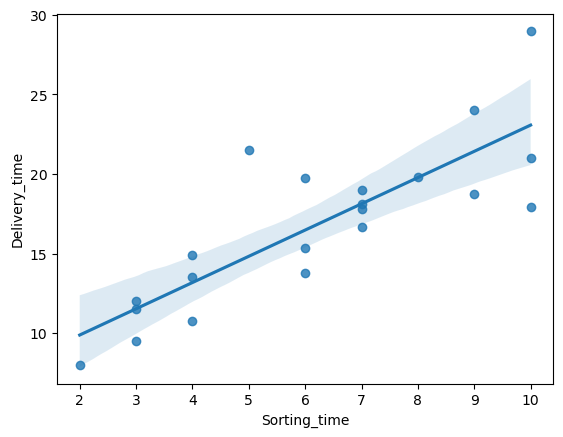

In [12]:
sns.regplot(x= df1['Sorting_time'],y= df1['Delivery_time'])

In [13]:
model = smf.ols('Delivery_time~Sorting_time',data = df1).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        17:56:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df1.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<Axes: >

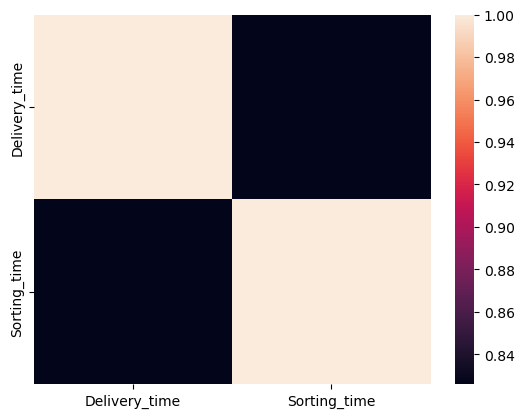

In [16]:
sns.heatmap(df1.corr())

## Square Root Transformation on data

In [17]:
model1=sm.ols('np.sqrt(Delivery_time)~np.sqrt(Sorting_time)',data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 27 Oct 2023   Prob (F-statistic):           8.48e-07
Time:                            17:56:49   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cube root Transformation on data

In [18]:
model2=sm.ols('np.cbrt(Delivery_time)~np.cbrt(Sorting_time)',data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 27 Oct 2023   Prob (F-statistic):           4.90e-07
Time:                            17:56:49   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation on data

In [19]:
model3=sm.ols('np.log(Delivery_time)~np.log(Sorting_time)',data=df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 27 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                           17:56:49   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log transformation model is best

#### R-squared: 0.772 and Adj. R-squared: 0.760

In [20]:
df1['Pred_Delivery_time']=np.exp(model3.predict(df1.Sorting_time))
df1

,Delivery_time,Sorting_time,Pred_Delivery_time
0,21.00,10,22.597360
1,13.50,4,13.070123
2,19.75,6,16.653216
3,24.00,9,21.218593
4,29.00,10,22.597360
5,15.35,6,16.653216
6,19.00,7,18.259981
7,9.50,3,11.005911
8,17.90,10,22.597360
9,18.75,9,21.218593


<Axes: xlabel='Delivery_time', ylabel='Pred_Delivery_time'>

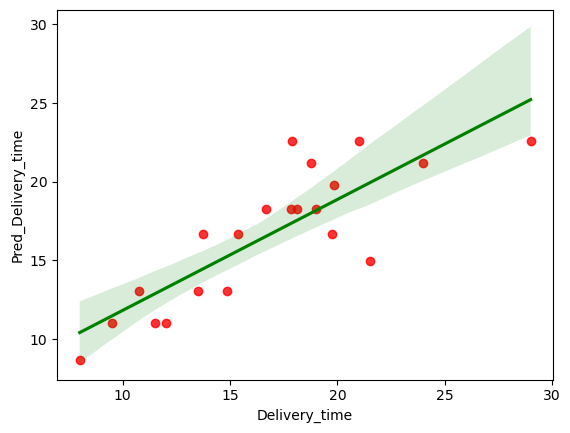

In [23]:
sns.regplot(data=df1,x=df1.Delivery_time,y=df1.Pred_Delivery_time,scatter_kws={'color':'red'},line_kws={'color':'green'})

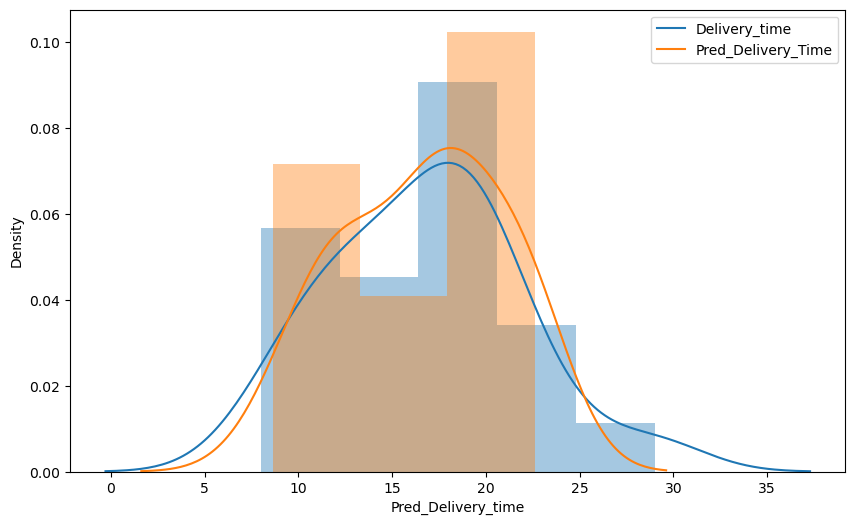

In [22]:
plt.figure(figsize=(10,6))
labels = ('Delivery_time','Pred_Delivery_Time')        
sns.distplot(df1.Delivery_time)
sns.distplot(df1.Pred_Delivery_time)
plt.legend(labels)